# Project 8: IMDB Movie Ratings & Sentiment Analysis


In [38]:
# EDA

import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.impute import SimpleImputer
import plotly.express as px

df = pd.read_csv("imdb_top_1000.csv")
print(df.dtypes)
# For the EDA I followed some steps, which are;

# Getting The Shape Of The DataSet
print(df.shape)

# Sorting Out Missing Values Using Simple Imputer
imputer=SimpleImputer(strategy='mean')
df[["Meta_score"]] = imputer.fit_transform(df[["Meta_score"]])
imputer=SimpleImputer(strategy='most_frequent')
df[["Certificate","Gross"]] = imputer.fit_transform(df[["Certificate","Gross"]])
print(df.isnull().sum())

#Checking For Duplicates
df1 = df.duplicated()
print(df1)

# Dataset Description
print(df.describe())


Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object
(1000, 16)
Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool
       IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  1000.00000  1.000000e+03

In [10]:
# 1. Which genres receive the highest ratings?

# Visualization was done to get the genre with the highest rating. Using Plotly.express,
#  a bar chart was created to show the top 20 genre with the highest rating and at the end,
# the genre with the highest rating turned out to be "Drama" with a rating of "9.3".

grouped_Genre = df.loc[df.groupby('Genre')['IMDB_Rating'].idxmax()]
top_ratings = grouped_Genre.sort_values(by='IMDB_Rating', ascending=False).head(20)

inny = px.bar(
    top_ratings,
    x='Genre',
    y='IMDB_Rating',
    color='Released_Year',
    title='Top Ratings For Each Genre',
    labels={'Genre': 'Genre', 'IMDB_Rating': 'IMDB_Rating'},
)
inny.show()

                            OLS Regression Results                            
Dep. Variable:            IMDB_Rating   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     62.68
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           6.44e-15
Time:                        10:56:49   Log-Likelihood:                -98.782
No. Observations:                1000   AIC:                             201.6
Df Residuals:                     998   BIC:                             211.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6563      0.038    201.718      0.0

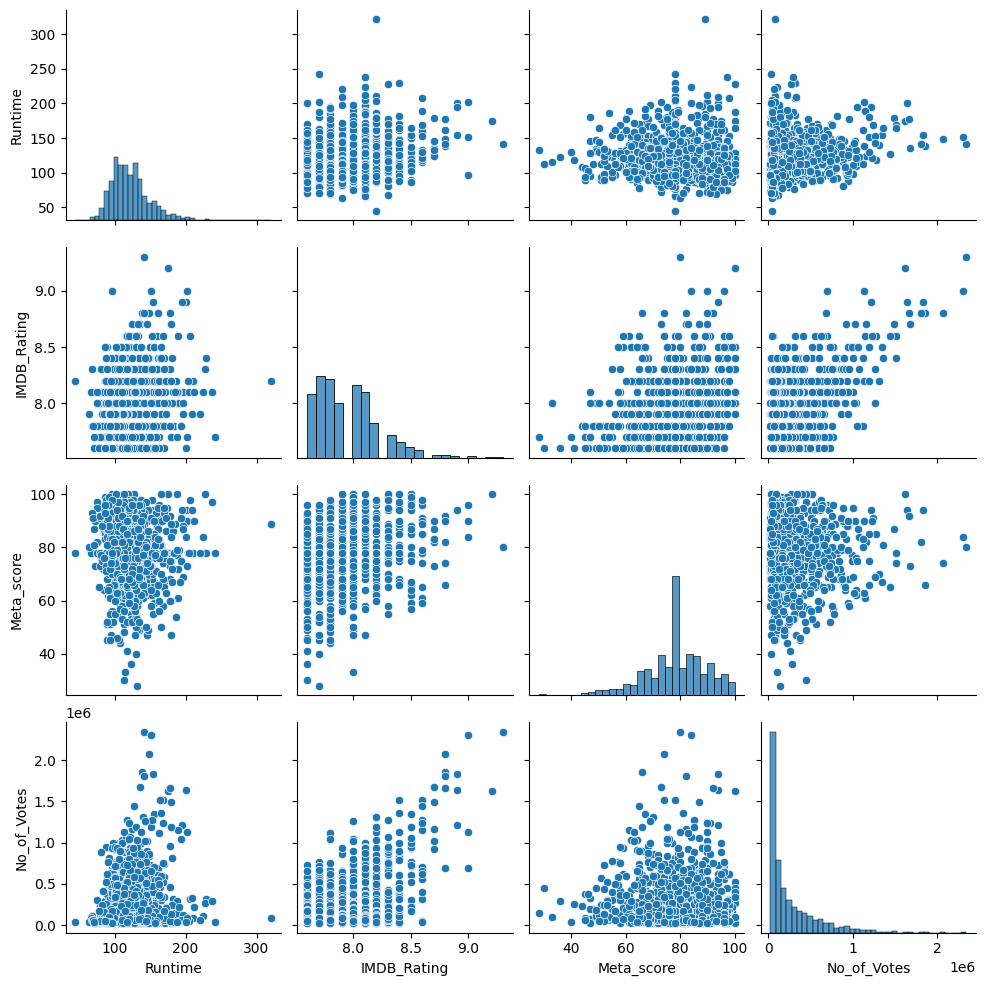

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.impute import SimpleImputer
import plotly.express as px
# 2. Does runtime affect movie ratings?

#To predict how runtime affects movie ratings, statsmodels.api was used to get the OLS Regression Results.
# Since Regression deals with plain numbers, the independent variable X (Runtime) was converted to plain numbers using .replace function.
df["Runtime"] = df["Runtime"].str.replace("min", "").astype(int)

#After the conversion, i ran the OLS Regression Result
X = sm.add_constant(df["Runtime"])
Y = df["IMDB_Rating"]
model = sm.OLS(Y, X).fit()
print(model.summary())

#The formula for regression is Y = a + bx + E
#The Constant Coefficient Value is 7.65.
#The Coefficient Value of Runtime is 0.0024.
#That means IMDB_RATING = 7.65 + 0.0024Runtime
# In other words it means Runtime affects IMDB_Rating postively by 0.0024 points. It also means if runtime increases by 1 minute, IMDB_Rating increases by 0.0024 points.

#After the whole analysis, a pairplot was used to show regression in visualization using seaborn and matplotlib.pyplot
sns.pairplot(df)
plt.show()

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.impute import SimpleImputer
import plotly.express as px
# 3. Can we predict box office success using metadata?

#To know if we can predict box office using metadata, firstly i choose Meta_score to represent the Metadata,
# and gross to represent Box Office since they basically mean the same thing.
#Next i ran a regression for the dependent variable X (Meta_score) and independent variable Y (Gross).

# Since Regression deals with plain numbers, the dependent variable Y (Gross) was converted to plain numbers using .replace function.
df["Gross"] = df["Gross"].str.replace(",", "").astype(int)

#OLS Regression

X = sm.add_constant(df["Meta_score"])
Y = df["Gross"]
model = sm.OLS(Y, X).fit()
print(model.summary())

# After running the regression, i used the model.predict function to predict the box office success (Gross)
# and a new column predicted_Boxofficesuccess was used to store the predicted value , thus showing that meta data can be used to predict box office sucess

df["predicted_Boxofficesuccess"] = model.predict(X)
print(df[["Series_Title", "Gross", "predicted_Boxofficesuccess"]])


                            OLS Regression Results                            
Dep. Variable:                  Gross   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.601
Date:                Sat, 26 Apr 2025   Prob (F-statistic):              0.107
Time:                        10:57:35   Log-Likelihood:                -19866.
No. Observations:                1000   AIC:                         3.974e+04
Df Residuals:                     998   BIC:                         3.975e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.326e+07   2.25e+07      4.136      0.0